In [123]:
from Dijkstra_module import dijkstra

In [124]:
import numpy as np

# Matriz de ejemplo
G = np.array([[0, 7, 9, np.inf, np.inf, 14],
              [7, 0, 10, 15, np.inf, np.inf],
              [9, 10, 0, 11, np.inf, 2],
              [np.inf, 15, 11, 0, 6, np.inf],
              [np.inf, np.inf, np.inf, 6, 0, 9],
              [14, np.inf, 2, np.inf, 9, 0]])

# Llamada a la función dijkstra
e, L = dijkstra(G, 1, 6)

# Resultados
print("Costo:", e)
print("Ruta:", L)


Costo: 11.0
Ruta: [1, 6]


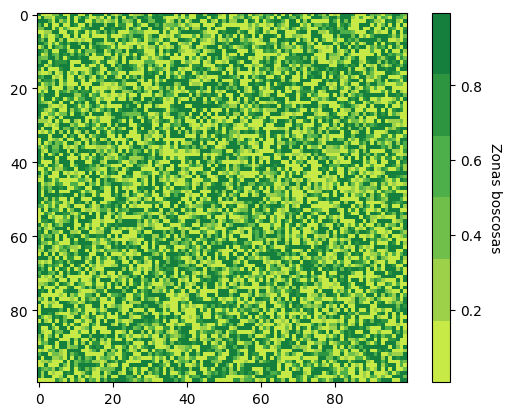

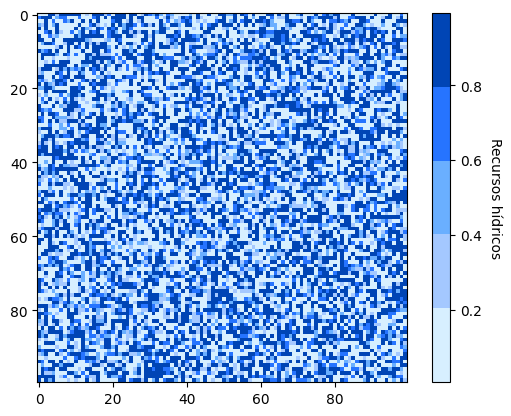

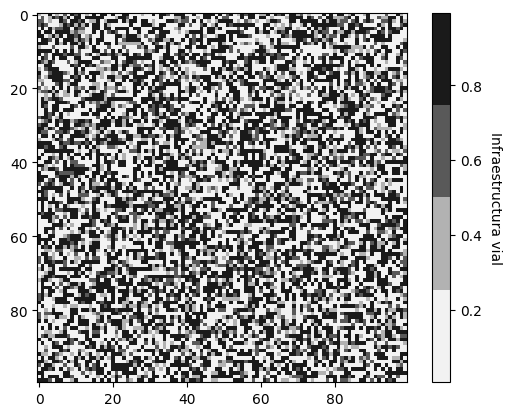

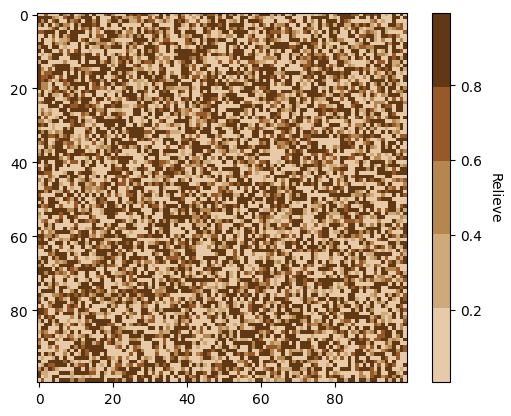

In [5]:
import mapping as mp

mp.crear_mapa_de_calor_boscoso()
mp.crear_mapa_de_calor_hidrico()
mp.crear_mapa_de_calor_vial()
mp.crear_mapa_de_calor_relieve()

## Generación de mapas de relieve usando el método de Perlin Noise

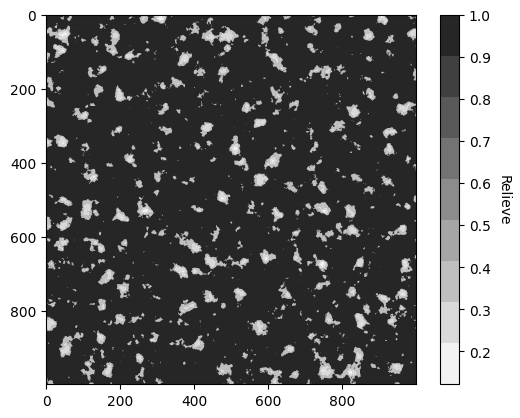

In [245]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from noise import snoise2  # librería para generar Perlin Noise

# Generar matriz aleatoria de 100x100 con valores entre 0 y 1
terrain = np.zeros((1000, 1000))

# Generar Perlin Noise y aplicar umbral para identificar franjas de relieve
freq = 30.0 * 2.0
for i in range(1000):
    for j in range(1000):
        terrain[i][j] = snoise2(i / freq, j / freq, octaves=5, persistence=0.5, lacunarity=2.2, repeatx=100, repeaty=100)
terrain = (terrain + 1) / 2  # Ajustar valores a rango [0, 1]
terrain[terrain > 0.4] = 1  # Identificar franjas de relieve

# Crear paleta de colores para relieve
colors = ['#F2F2F2', '#D9D9D9', '#BFBFBF', '#A6A6A6', '#8C8C8C', '#737373', '#595959', '#404040', '#262626']
cmap = ListedColormap(colors)

# Crear mapa de calor para relieve
fig, ax = plt.subplots()
im = ax.imshow(terrain, cmap=cmap)

# Añadir leyenda
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Relieve", rotation=-90, va="bottom")

# Mostrar mapa de calor
plt.show()


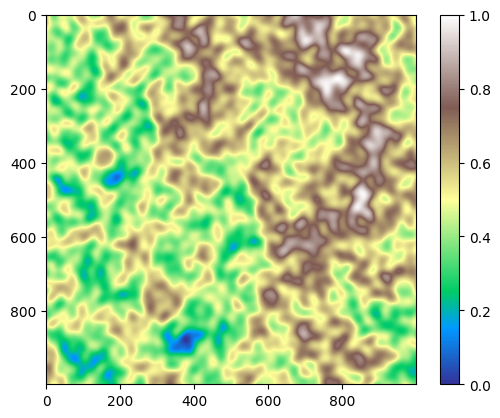

In [286]:
import noise
import numpy as np
import matplotlib.pyplot as plt

shape = (1000, 1000)
scale = 1000.0
octaves = 5
persistence = 1
lacunarity =2
seed = 2023
# Generamos la función de ruido
world = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.snoise2(i/scale, j/scale, octaves=octaves, persistence=persistence, lacunarity=lacunarity, base= seed)

# Normalizamos los valores para que estén entre 0 y 1
world = (world - np.min(world)) / (np.max(world) - np.min(world))

# Creamos el mapa de calor
plt.imshow(world, cmap='terrain')
plt.colorbar()
plt.show()


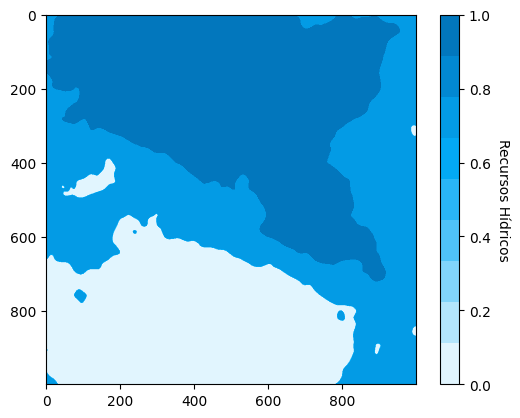

In [284]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import noise

# Generar mapa de alturas
shape = (1000, 1000)
scale = 1000.0
octaves = 6
persistence = 0.5
lacunarity = 2
seed = 2023
world = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i/scale, 
                                    j/scale, 
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity, 
                                    repeatx=1024, 
                                    repeaty=1024, 
                                    base=seed)

# Ajustar valores a rango [0, 1]
world = (world - np.min(world)) / (np.max(world) - np.min(world))

# Crear matriz de recursos hídricos
water = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        if world[i][j] > 0.4 and world[i][j] < 0.6:
            water[i][j] = 0.7
        elif world[i][j] >= 0.6:
            water[i][j] = 1.0

# Crear paleta de colores para recursos hídricos
colors = ['#E1F5FE', '#B3E5FC', '#81D4FA', '#4FC3F7', '#29B6F6', '#03A9F4', '#039BE5', '#0288D1', '#0277BD']
cmap = ListedColormap(colors)

# Crear mapa de calor para recursos hídricos
fig, ax = plt.subplots()
im = ax.imshow(water, cmap=cmap)

# Añadir leyenda
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Recursos Hídricos", rotation=-90, va="bottom")

# Mostrar mapa de calor
plt.show()


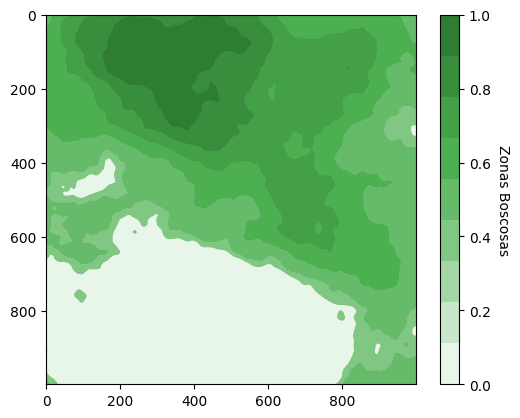

In [283]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import noise

# Generar mapa de alturas
shape = (1000, 1000)
scale = 1000.0
octaves = 6
persistence = 0.5
lacunarity = 2.0
seed = 2023
world = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        world[i][j] = noise.pnoise2(i/scale, 
                                    j/scale, 
                                    octaves=octaves, 
                                    persistence=persistence, 
                                    lacunarity=lacunarity, 
                                    repeatx=1024, 
                                    repeaty=1024, 
                                    base=seed)

# Ajustar valores a rango [0, 1]
world = (world - np.min(world)) / (np.max(world) - np.min(world))

# Crear matriz de zonas boscosas
forests = np.zeros(shape)
for i in range(shape[0]):
    for j in range(shape[1]):
        if world[i][j] > 0.4:
            forests[i][j] = world[i][j]

# Crear paleta de colores para zonas boscosas
colors = ['#E8F5E9', '#C8E6C9', '#A5D6A7', '#81C784', '#66BB6A', '#4CAF50', '#43A047', '#388E3C', '#2E7D32']
cmap = ListedColormap(colors)

# Crear mapa de calor para zonas boscosas
fig, ax = plt.subplots()
im = ax.imshow(forests, cmap=cmap)

# Añadir leyenda
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel("Zonas Boscosas", rotation=-90, va="bottom")

# Mostrar mapa de calor
plt.show()


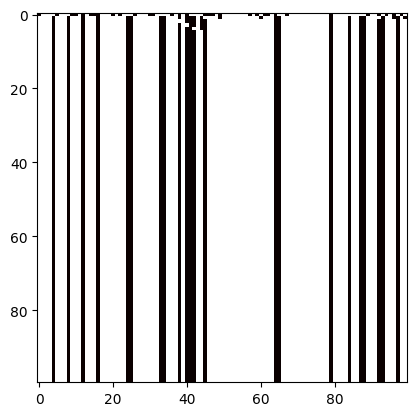

In [121]:
import random

state = np.zeros((100, 100))
class Car:
    def __init__(self, speed, position):
        self.speed = speed
        self.position = position
    
    def move(self, road):
        next_pos = self.position + self.speed
        if next_pos >= len(road):
            next_pos = next_pos - len(road)
        if road[next_pos] == 0:
            self.position = next_pos
        else:
            self.speed = 0
    
class Road:
    def __init__(self, length):
        self.length = length
        self.cars = []
        self.grid = [0] * length
    
    def add_car(self, speed):
        pos = random.randint(0, self.length-1)
        self.cars.append(Car(speed, pos))
        self.grid[pos] = 1
    
    def update(self):
        for car in self.cars:
            car.move(self.grid)
        self.grid = [0] * self.length
        for car in self.cars:
            self.grid[car.position] = 1
    
    def display(self, t):
        state[t, :] = self.grid

class Simulator:
    def __init__(self, num_cars, road_length):
        self.num_cars = num_cars
        self.road = Road(road_length)
    
    def setup(self):
        for i in range(self.num_cars):
            speed = random.randint(1, 5)
            self.road.add_car(speed)
    
    def run(self, steps):
        for i in range(steps):
            self.road.display()
            self.road.update()

sim = Simulator(100, 100)
sim.setup()
# Ejecutar la simulación y guardar el estado de la carretera en cada paso de tiempo
for i in range(100):
    sim.road.display(i)
    sim.road.update()

# Graficar el mapa de calor
plt.imshow(state, cmap='hot', interpolation='nearest')
plt.show()
